# Problem Statement

* We will be exploring the Starbuck’s Dataset which simulates how people make purchasing decisions and how those decisions are influenced by promotional offers. 
* There are three **offers_types** that can be sent: buy-one-get-one (BOGO), discount, and informational. 
* We will segment the customer data on different parameters and check its behavious on different **offer_tyoes** using both supervised and unsupervised learning
* We will analyse the data in the Exploratory Data Analysis part of this section and answer the following questions related to customer segmentation and its buying behavious.


- 1. What is the Gender Distribution of Starbucks Customers?
- 2. What is the Age Distribution and average age of Starbucks Customers?
- 3. What is the Income Distribution and average Income of Starbucks Customers?
- 4. How many customers enrolled yearly?
- 5. Which gender has the highest yearly membership?
- 6. Which gender has the highest Annual income?
- 7. What is the distribution of event  in  transcripts?
- 8. What is the percent of trasactions and offers in the event?
- 9. What are the types of offers : received,views, completed ?
- 10. What is the Income Distribution for the Offer Events?
- 11. What are the Offer types amongst ages, gender and income groups?
- 12. What is the highest completed offer?
- 13. What is the lowest completed offer?


#### 1.Data Preparation
#### 2.Data understanding
#### 3.Cleaning the data
#### 4.Exploratory Data Analysis
#### 5.Data Modelling
#### 6.Conclusion

## Data Preparing

In [1]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
#% matplotlib inline



In [2]:
# read in the json files
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

## Data understanding
The data is provided by Starbucks with three files containing the following information:
* 3 .json files.
    * portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
    * profile.json - demographic data for each customer
    * transcript.json - records for transactions, offers received, offers viewed, and offers completed


**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

In [3]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

In [4]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN



**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

In [5]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


### Cleaning each dataset
we will go though the each data diles and clean them and convert them into the formats to use the data for futhur analysis

Rename the id columns of every dataset to its respective tags to avoid confusion

In [6]:
# rename the id columns for ease of understanding
portfolio.rename(columns={"id":"offer_id"}, inplace=True)
profile.rename(columns={"id":"customer_id"}, inplace=True)
transcript.rename(columns={"person":"customer_id"}, inplace=True)

### Clean Portfolio Data:

- One-hot encode channels
- One-hot encode offer_type column

In [7]:
portfolio

,reward,channels,difficulty,duration,offer_type,offer_id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


We can see from above that the portfolio dataset consists of 10 not-null entries that contains information about the offers provided by starbucks

We can see a histogram containing a distribution of 3 types of offers in 10 entries

In [8]:
# One-hot encode : channels column
channels = portfolio["channels"].str.join(sep="*").str.get_dummies(sep="*")
    
# One-hot encode : offer_type column
offer_type = pd.get_dummies(portfolio['offer_type'])
    
# Concat one-hot into a portfolio_df
portfolio_df = pd.concat([portfolio, channels, offer_type], axis=1, sort=False)

# Remove channels and offer_type
portfolio = portfolio_df.drop(['channels'], axis=1)
portfolio_df

,reward,channels,difficulty,duration,offer_type,offer_id,email,mobile,social,web,bogo,discount,informational
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,1,0,0
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,0,0,1
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,1,0,0
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,0,1,0
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,0,1,0
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,0,1,0
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,0,0,1
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,1,0,0
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,0,1,0


### Clean Profile Data
- Check for null values
- check the age column for extreme values (118)
- Drop rows with no gender, income, age of 118
- Create readable date format in became_member_on column
- Extract its year from became_member_on column add start_year columns (for further analysis)

In [9]:
profile

,gender,age,customer_id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [10]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   customer_id       17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [11]:
profile.isnull().sum()

gender              2175
age                    0
customer_id            0
became_member_on       0
income              2175
dtype: int64

In [12]:
profile.age.describe()

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64

We have age as 118 which isnt practical ans is an outlier value. Lets check the count of 118 values in the column

In [13]:
profile.where(profile.age==118).count()

gender                 0
age                 2175
customer_id         2175
became_member_on    2175
income                 0
dtype: int64

There are 2175 null values in gender and income columns and age column has 118 has  2175 values. 
Since we have the same number of null values and 118 are same these columns, we need to check do they lie in the same row.

In [14]:
# Check if NaN values for  gender & income and 118 value of age columnalways occur in same rows
profile[(profile.age == 118) & (profile.gender.isnull()) & (profile.income.isnull())]

,gender,age,customer_id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


These NaN values and 118  occur in the same rows, resulting in 2,175 out of 17,000 customers without any demographic data. 
There wont be any means to keep this data which could hamper the accuracy of the model,
Although this means dropping more than 10 percent of the customer data, We will have to drop these rows.

In [15]:
# profile: drop rows with no gender, income, age data
profile = profile.drop(profile[profile['gender'].isnull()].index)
profile.isnull().sum()

gender              0
age                 0
customer_id         0
became_member_on    0
income              0
dtype: int64

Hence, cleared all the null values

In [16]:
# Convert to datetime
profile.became_member_on = pd.to_datetime(profile.became_member_on, format = '%Y%m%d')
profile['start_year'] = profile.became_member_on.dt.year

In [17]:
profile

,gender,age,customer_id,became_member_on,income,start_year
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2017
...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,2018
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,2018
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,2017
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,2016


### Clean Transcript Data

- Create separate columns for amount and offer_id from value column dictionary
- merge the three datasets with common columns
- transcript: segregate offer and transaction data 
- Label the columns - offer_id. offer_type, gender, and the unique customer_ids to convert them into integer data tpe
- Create a offers dataframe by seperating it from transaction in the event column

In [18]:
transcript.head()

,customer_id,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [19]:
# Functions to create offer id and amount columns from the transcript table.
def create_offer_id_column(val):
    if list(val.keys())[0] in ['offer id', 'offer_id']:
        return list(val.values())[0]
    
def create_amount_column(val):
    if list(val.keys())[0] in ["amount"]:
        return list(val.values())[0]


In [20]:
# Create separate columns for amount and offer_id and reward from value col dictionary.
transcript['offer_id'] = transcript.value.apply(create_offer_id_column)
transcript['amount'] = transcript.value.apply(create_amount_column)


# change amount and reward column type to float
transcript.amount.astype('float')
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  306534 non-null  object 
 1   event        306534 non-null  object 
 2   value        306534 non-null  object 
 3   time         306534 non-null  int64  
 4   offer_id     167581 non-null  object 
 5   amount       138953 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 14.0+ MB


In [21]:
transcript.drop(columns=['value'], inplace=True)
transcript.head()

,customer_id,event,time,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


## Merge the three data sets with common columns into one for futhur analysis

In [22]:
# merge the transcript and profile dataframes on customer_id column
transcript = transcript.merge(profile, on=['customer_id'])
transcript.head(3)

,customer_id,event,time,offer_id,amount,gender,age,became_member_on,income,start_year
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,2017
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,2017
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,None,19.89,F,75,2017-05-09,100000.0,2017


In [23]:
# merge the transcript and portfolio  on customer_id column using left join
# To maintain all the offer_ids from the transcript column
transcript = transcript.merge(portfolio, on=['offer_id'], how='left')

In [24]:
transcript

,customer_id,event,time,offer_id,amount,gender,age,became_member_on,income,start_year,...,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,2017,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,2017,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,None,19.89,F,75,2017-05-09,100000.0,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,2017,...,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,None,17.78,F,75,2017-05-09,100000.0,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272757,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,504,3f207df678b143eea3cee63160fa8bed,NaN,M,47,2017-10-13,94000.0,2017,...,0.0,4.0,informational,1.0,1.0,0.0,1.0,0.0,0.0,1.0
272758,9fcbff4f8d7241faa4ab8a9d19c8a812,offer received,576,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,M,47,2017-10-13,94000.0,2017,...,10.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0
272759,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,576,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,M,47,2017-10-13,94000.0,2017,...,10.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0
272760,3045af4e98794a04a5542d3eac939b1f,offer received,576,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,F,58,2016-10-20,78000.0,2016,...,10.0,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0


### Data Labelling
- Label the columns - offer_id. offer_type, gender, and the unique customer_ids

In [25]:
#Label Encoding the category columns- 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#label encoding - offer_id (10 different IDs) from the portfolio data set
le1 = preprocessing.LabelEncoder()
le1.fit(portfolio.offer_id)
transcript['offer_id'] = le1.fit_transform(transcript['offer_id'].astype(str))


#label encoding - offer_type from the portfolio data set (3 different types, bogo-discount-informational)
le2 = preprocessing.LabelEncoder()
le2.fit(portfolio.offer_type)
transcript['offer_type'] = le2.fit_transform(transcript['offer_type'].astype(str))


# label encoding for gender from the profile data set(4 different types, male-female-other)
le3 = preprocessing.LabelEncoder()
le3.fit(profile.gender)
transcript['gender'] = le3.fit_transform(transcript['gender'].astype(str))

In [26]:
transcript.head()

,customer_id,event,time,offer_id,amount,gender,age,became_member_on,income,start_year,...,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,6,NaN,0,75,2017-05-09,100000.0,2017,...,5.0,7.0,0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,6,NaN,0,75,2017-05-09,100000.0,2017,...,5.0,7.0,0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,10,19.89,0,75,2017-05-09,100000.0,2017,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,6,NaN,0,75,2017-05-09,100000.0,2017,...,5.0,7.0,0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,10,17.78,0,75,2017-05-09,100000.0,2017,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#To retrive its original value we can use its inverse function
le3.inverse_transform([0,1,2])

array(['F', 'M', 'O'], dtype=object)

In [28]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272762 entries, 0 to 272761
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       272762 non-null  object        
 1   event             272762 non-null  object        
 2   time              272762 non-null  int64         
 3   offer_id          272762 non-null  int32         
 4   amount            123957 non-null  float64       
 5   gender            272762 non-null  int32         
 6   age               272762 non-null  int64         
 7   became_member_on  272762 non-null  datetime64[ns]
 8   income            272762 non-null  float64       
 9   start_year        272762 non-null  int64         
 10  reward            148805 non-null  float64       
 11  difficulty        148805 non-null  float64       
 12  duration          148805 non-null  float64       
 13  offer_type        272762 non-null  int32         
 14  emai

In [29]:
# label the unique customer ids, create a mapper function to avoid duplication.
def id_label(customer_id):
    """
    
    Description:
    This function will label ;ong values of customer_ids '912b9f623b9e4b4eb99b6dc919f09a93' to unique integers.
    
    INPUT: 
    customer_id (str): transcript column to be labeled whose values are to be changed
    
    OUTPUT:
    coded_id (list): list of the labelled integers for each value
     
    """
    coded_dict = dict()
    counter = 1
    col_name=str(customer_id)
    coded_id = []
    
    for val in transcript[customer_id]:
        try: 
            if isinstance(val, str):
                if val not in coded_dict:
                    coded_dict[val] = counter
                    counter+=1

                coded_id.append(coded_dict[val])
            else:
                coded_dict[val] = np.nan
                coded_id.append(coded_dict[val])
        except:
            pass
    del transcript[customer_id]
    return coded_id

In [30]:
transcript['customer_id'] = id_label("customer_id")

In [31]:
transcript.customer_id.nunique()

14825

In [32]:
transcript.head()

,event,time,offer_id,amount,gender,age,became_member_on,income,start_year,reward,...,duration,offer_type,email,mobile,social,web,bogo,discount,informational,customer_id
0,offer received,0,6,NaN,0,75,2017-05-09,100000.0,2017,5.0,...,7.0,0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1
1,offer viewed,6,6,NaN,0,75,2017-05-09,100000.0,2017,5.0,...,7.0,0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1
2,transaction,132,10,19.89,0,75,2017-05-09,100000.0,2017,NaN,...,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,offer completed,132,6,NaN,0,75,2017-05-09,100000.0,2017,5.0,...,7.0,0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1
4,transaction,144,10,17.78,0,75,2017-05-09,100000.0,2017,NaN,...,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


- Create a offers dataframe by seperating it from transaction in the event column
- Offer dataframe consist of all the offer types- offer_received, offer_viewed, offer_completed 

In [33]:
# Seperate the three offer columns from the transaction column
transaction_df = transcript[transcript.event == "transaction"]
transaction_df.head()

,event,time,offer_id,amount,gender,age,became_member_on,income,start_year,reward,...,duration,offer_type,email,mobile,social,web,bogo,discount,informational,customer_id
2,transaction,132,10,19.89,0,75,2017-05-09,100000.0,2017,NaN,...,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,transaction,144,10,17.78,0,75,2017-05-09,100000.0,2017,NaN,...,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,transaction,222,10,19.67,0,75,2017-05-09,100000.0,2017,NaN,...,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,transaction,240,10,29.72,0,75,2017-05-09,100000.0,2017,NaN,...,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,transaction,378,10,23.93,0,75,2017-05-09,100000.0,2017,NaN,...,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [34]:
# Seperate the three offer columns from the transaction column
offers_df = transcript[transcript.event != "transaction"]
offers_df.head()

,event,time,offer_id,amount,gender,age,became_member_on,income,start_year,reward,...,duration,offer_type,email,mobile,social,web,bogo,discount,informational,customer_id
0,offer received,0,6,NaN,0,75,2017-05-09,100000.0,2017,5.0,...,7.0,0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1
1,offer viewed,6,6,NaN,0,75,2017-05-09,100000.0,2017,5.0,...,7.0,0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1
3,offer completed,132,6,NaN,0,75,2017-05-09,100000.0,2017,5.0,...,7.0,0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1
5,offer received,168,5,NaN,0,75,2017-05-09,100000.0,2017,0.0,...,3.0,2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1
6,offer viewed,216,5,NaN,0,75,2017-05-09,100000.0,2017,0.0,...,3.0,2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1


## Exploratory Data Analysis

###  Analysis:

- 1. What is the Gender Distribution of Starbucks Customers?
- 2. What is the Age Distribution and average age of Starbucks Customers?
- 3. What is the Income Distribution and average Income of Starbucks Customers?
- 4. How many customers enrolled yearly?
- 5. Which gender has the highest yearly membership?
- 6. Which gender has the highest Annual income?
- 7. What is the distribution of event  in  transcripts?
- 8. What is the percent of trasactions and offers in the event?
- 9. What are the types of offers : received,views, completed ?
- 10. What is the Income Distribution for the Offer Events?
- 11. What are the Offer types amongst ages, gender and income groups?
- 12. What is the highest completed offer?
- 13. What is the lowest completed offer?
    

In [35]:
profile.head()

,gender,age,customer_id,became_member_on,income,start_year
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2017


#### Ques: 1 What is the Gender Distribution of Starbucks Customers?

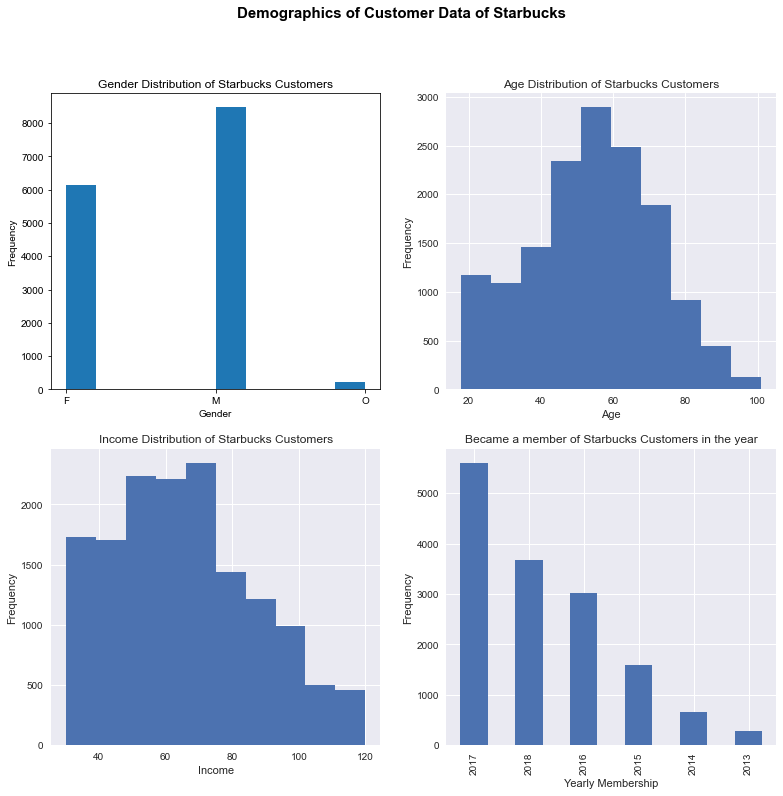

In [36]:
#Creating Subplots for distribution based on Gender,Age,Income and start year of membership for the cleaned Profile data
fig, ax = plt.subplots(2, 2, figsize=(13, 12))
fig.suptitle('Demographics of Customer Data of Starbucks', fontsize=15, weight='bold')

# GENDER BASED SUBPLOT
plt.subplot(2, 2, 1)
plt.hist(profile['gender']);
plt.style.use('seaborn');
plt.title('Gender Distribution of Starbucks Customers');
plt.xlabel("Gender");
plt.ylabel("Frequency");


# AGE BASED SUBPLOT
plt.subplot(2, 2, 2)
plt.hist(profile['age']);
plt.style.use('seaborn')
plt.title("Age Distribution of Starbucks Customers" );
plt.xlabel("Age");
plt.ylabel("Frequency");

# INCOME BASED  SUBPLOT
plt.subplot(2, 2, 3)
plt.hist(profile['income'] * 1E-3 );
plt.style.use('seaborn')
plt.title("Income Distribution of Starbucks Customers");
plt.xlabel("Income");
plt.ylabel("Frequency");


# BECAME A MEMBER OF STARBUCKS ON(YEAR) SUBPLOT
plt.subplot(2, 2, 4)
profile["start_year"].value_counts().plot(kind = 'bar'); 
plt.style.use('seaborn')
plt.title("Became a member of Starbucks Customers in the year");
plt.xlabel("Yearly Membership");
plt.ylabel("Frequency");

plt.show()

- Ans1: The proprtion of males(around 9000) is slightly more than those of the females(around 6000)and very small amount of others

#### Ques2. What is the Age Distribution and average age of Starbucks Customers?

In [37]:
profile['age'].describe()['mean']

54.39352445193929

- Ans2: Age group range from 40-70 frequently visit starbucksrbucks, the reason can be steady life after 40.
- with an average of 54 years.

#### Ques3: What is the Income Distribution and average Income of Starbucks Customers?

In [38]:
profile['income'].describe()['mean']

65404.9915682968

- Ans 3: There is a decrease in the number of customers as after 70K, 
    mentioning as the income increases people spend less on coffe.
- with an average income of 65k.

#### Ques4. How many customers enrolled yearly?

In [39]:
profile["start_year"].value_counts()

2017    5599
2018    3669
2016    3024
2015    1597
2014     662
2013     274
Name: start_year, dtype: int64

- Ans4: Members of the starbucks increased exponentially from 2013 and reached its highest in 2017 which later declines steadily
- 5599 customers enrolled in 2017

#### Ques5 : Which gender has the highest yearly membership? 

In [40]:
# groupby start_year and gender to plot a graph
membership_year = profile.groupby(['start_year', 'gender'])["age"].count().reset_index()
membership_year.head()

,start_year,gender,age
0,2013,F,74
1,2013,M,197
2,2013,O,3
3,2014,F,138
4,2014,M,520


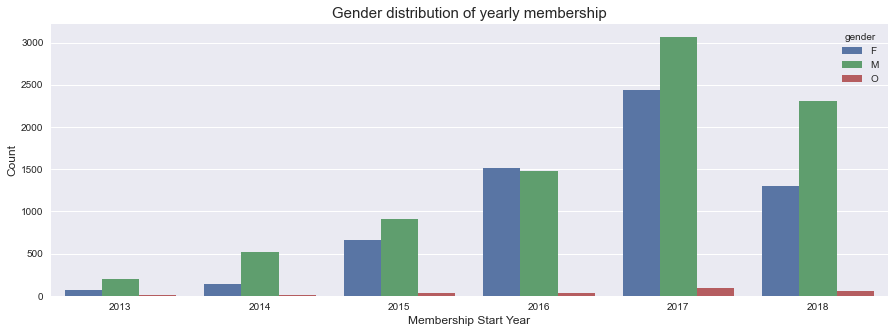

In [41]:
#plot a bar graph for membership program as a function of gender 
plt.figure(figsize=(15, 5))
sns.barplot(x='start_year', y='age', hue='gender', data=membership_year);
plt.xlabel('Membership Start Year',fontsize = 12);
plt.ylabel('Count',fontsize = 12);
plt.title("Gender distribution of yearly membership", fontsize = 15)
plt.show()

- Ans5: With the increase in popularity of starbucks, people have joined starbucks yerly exponentially and reached its zenith in 2017.
- more men have joined than the female and very few from others every year. 


#### Ques6 :Which gender has the highest Annual income?

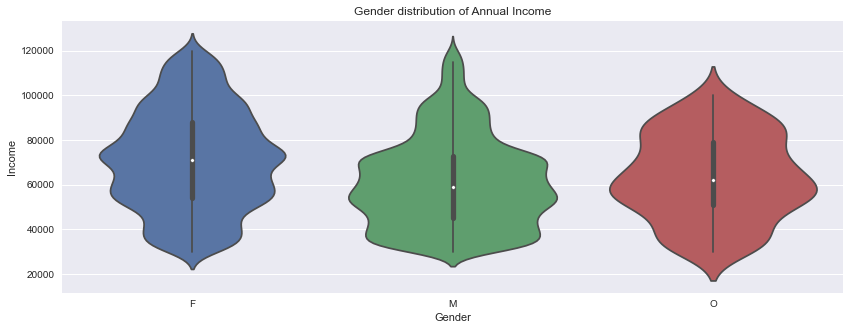

In [42]:
plt.figure(figsize=(14, 5))
sns.violinplot(x=profile['gender'], y=profile['income'])
plt.title('Gender distribution of Annual Income')
plt.ylabel('Income')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.show();

- The highest and the lowest income for both male and female are approximately same and for others it is less on both the sides.
- The median income (the white dot) for females (around **70k**) is higher than males and others (around **60k)**
- for females the income spreads from **40k** to **100k**. 
- For males most the spread is around **40k** to **70k** which close to median.
- for others the spread is around **60K**
- The count of male customers in low-income level is slightly higher than that of female  and other customers

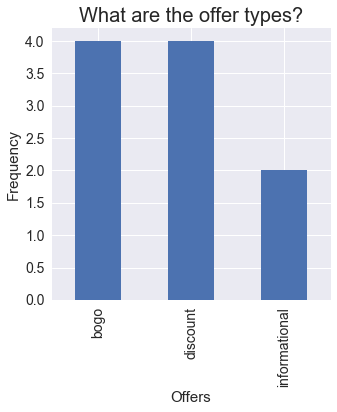

In [43]:
ax = portfolio["offer_type"].value_counts().plot.bar(figsize=(5,5),fontsize=14,)
ax.set_title("What are the offer types?", fontsize=20)
ax.set_xlabel("Offers", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)
sns.despine(bottom=True, left=True)

#### Ques7: What is the distribution of event  in  transcripts?

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


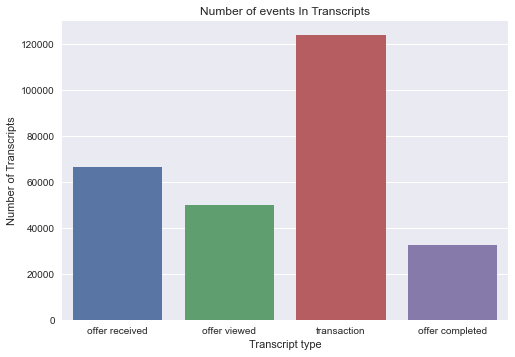

In [44]:
sns.countplot(transcript['event'])
plt.title('Number of events In Transcripts')
plt.ylabel('Number of Transcripts')
plt.xlabel('Transcript type')
plt.xticks(rotation = 0)
plt.show();

- Ans7: We can see that most of the transcripts are transactions. 
- Around **75%** of the offer received were viewed. And nearly **50%** of the viewed offers were completed.

#### Ques8: What is the percent of trasactions and offers in the event?

In [45]:
event_counts = transcript['event'].value_counts()
event_counts

transaction        123957
offer received      66501
offer viewed        49860
offer completed     32444
Name: event, dtype: int64

In [46]:
#tranaction percent and offer percent

transactions_percent = 100 * event_counts[0] / event_counts.sum()
offers_percent = 100 * event_counts[1:].sum() / event_counts.sum()

(transactions_percent, offers_percent)

(45.44511332223697, 54.55488667776303)

- Ans 8: Nearly 45.5% are trasactions and 54.5% are offers.

#### Ques9: What are the types of  offers  : received,views, completed ?

In [47]:
offers_df.event.value_counts()

offer received     66501
offer viewed       49860
offer completed    32444
Name: event, dtype: int64

In [48]:
offer_received = offers_df[offers_df["event"] == "offer received"]
offer_viewed = offers_df[offers_df["event"]== "offer viewed"]
offer_completed = offers_df[offers_df["event"] == "offer completed"]


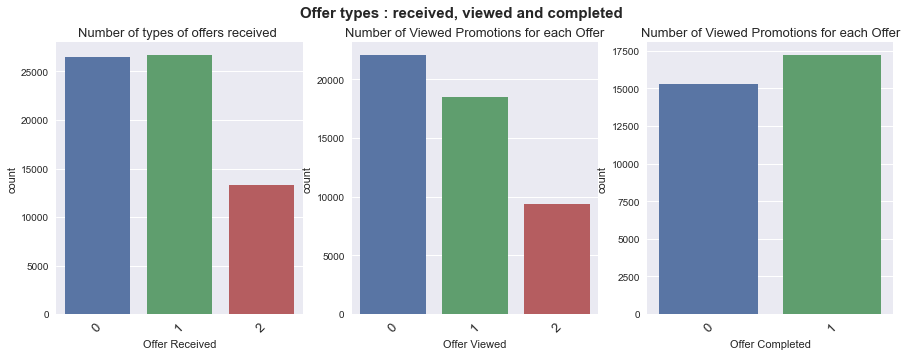

In [49]:
# Visualize distribution of membership days grouped by success
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Offer types : received, viewed and completed', fontsize=15, weight='bold')

# Subplot for bogo offers
plt.subplot(1, 3, 1)
sns.countplot(x=offer_received['offer_type'])
plt.title('Number of types of offers received ', fontsize=13)
plt.xlabel('Offer Received')
plt.xticks(rotation = 45, fontsize=13)


# Subplot for discount offers
plt.subplot(1, 3, 2)
sns.countplot(x=offer_viewed['offer_type'])
plt.title('Number of Viewed Promotions for each Offer', fontsize=13)
plt.xlabel('Offer Viewed')
plt.xticks(rotation = 45, fontsize=13)

# Subplot for informational offers
plt.subplot(1, 3, 3)
sns.countplot(x=offer_completed['offer_type'])
plt.title('Number of Viewed Promotions for each Offer', fontsize=13)
plt.xlabel('Offer Completed')
plt.xticks(rotation = 45, fontsize=13)
plt.show()

In [50]:
le2.inverse_transform([0, 1, 2, 3])

array(['bogo', 'discount', 'informational', 'nan'], dtype=object)

- Ans9: More of Bogo and Dicount offers were received by the customers than that of informational.
- More Bogo offers have been viewed
- Most of the discount offers have been completed and no informational offer completed.
- Hence, in order to make a offer complete, more of discount offers must be sent to the customers.
- Here, bogo has also been a good offer since high number of customers view such offers.m

#### Ques10: What is the Income Distribution for the Offer Events?

In [51]:
#Create a age group Column cleaning by  segregation
offers_df['age_groups'] = pd.cut(offers_df.age, bins=[11, 20, 30, 40, 50, 60, 70, 80, 110], 
                               labels=['11-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'])


#Create a Income group Column cleaning by  segregation
offers_df['income_groups'] = pd.cut(x=profile["income"],
                                    bins=[30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000,  120000],
                                   labels =['30-40K','40-50K','50-60K','60-70K','70-80K','80-90K','90-100K','100-110K','110-120K'])

<ipython-input-51-016095e3a05f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offers_df['age_groups'] = pd.cut(offers_df.age, bins=[11, 20, 30, 40, 50, 60, 70, 80, 110],
<ipython-input-51-016095e3a05f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offers_df['income_groups'] = pd.cut(x=profile["income"],


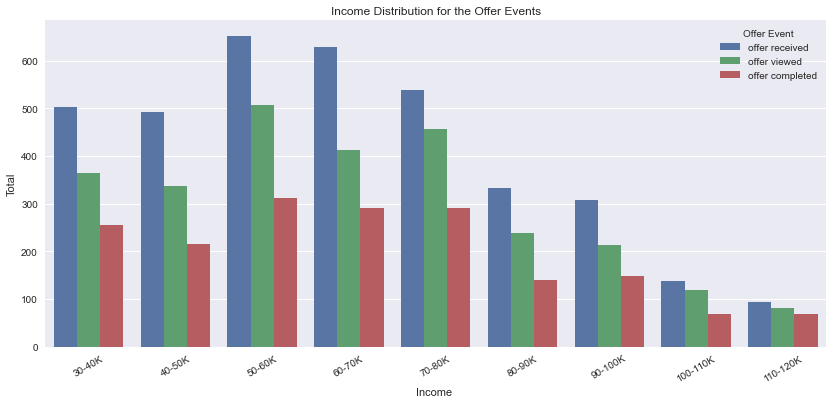

In [52]:
plt.figure(figsize=(14, 6))
sns.countplot(x=offers_df['income_groups'], hue="event", data=offers_df)
plt.title("Income Distribution for the Offer Events")
plt.ylabel('Total')
plt.xlabel('Income ')
plt.xticks(rotation = 30)
plt.legend(title='Offer Event')
plt.show();


- **Ans10:** Highest Offer is received by income group of 50-60k with the least of 110-120k.
- The highest offer completed is also from 50-60k and decreses on either side with a larger slope on the higher income groups.
- starbucks have  lesser higher income group customers.

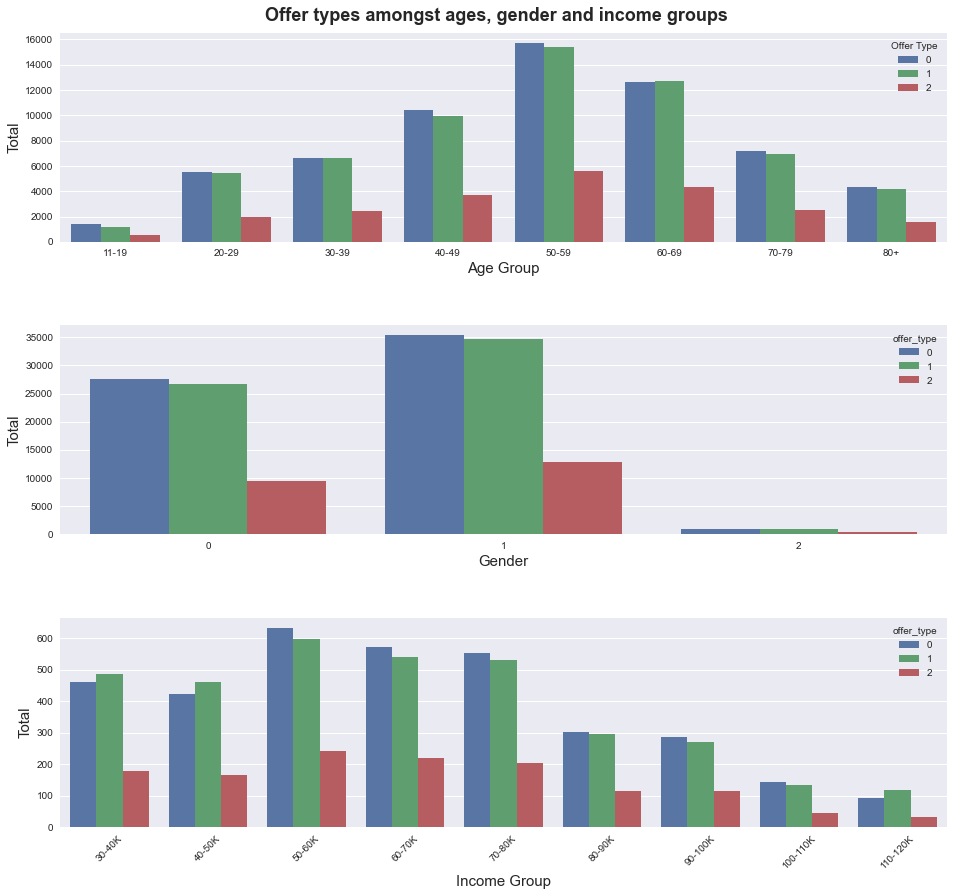

In [53]:
fig, ax = plt.subplots(1, 3, figsize=(13, 12))
fig.suptitle('Offer types amongst ages, gender and income groups', fontsize=18, weight='bold')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.9, 
                    wspace=0.4, 
                    hspace=0.4)

fig.tight_layout()

#fig.tight_layout(pad=5.0)
plt.subplot(3, 1, 1)
#plt.figure(figsize=(14, 5))
sns.countplot(x="age_groups", hue="offer_type", data=offers_df);
plt.ylabel('Total',fontsize=15);
plt.xlabel('Age Group',fontsize=15);
plt.xticks(rotation = 0);
plt.legend(title='Offer Type');

plt.subplot(3, 1, 2)
sns.countplot(x=offers_df['gender'], hue = 'offer_type', data=offers_df);
plt.ylabel('Total',fontsize=15);
plt.xlabel('Gender',fontsize=15);
plt.xticks(rotation = 0);

plt.subplot(3, 1, 3)
sns.countplot(x=offers_df['income_groups'], hue = 'offer_type', data=offers_df)
plt.ylabel('Total',fontsize=15)
plt.xlabel('Income Group',fontsize=15)
plt.xticks(rotation = 45)
plt.show();



In [54]:
le2.inverse_transform([0, 1, 2, 3])

array(['bogo', 'discount', 'informational', 'nan'], dtype=object)

In [55]:
le3.inverse_transform([0, 1, 2])

array(['F', 'M', 'O'], dtype=object)

- **Ans11:** We can see from the above graphs that, Bogo is slightly more popular amongst the ages,gender and income groups.
- 50-59 age group is more respondent to these offers than the otherer groups
- Also, for the income distribution, the informational offer is almost round 50% than the other two.
- Most male are respondents of these offers than the females with BOGO its leading type
- To sumup it up,  the active starbucks customer respondents are from the age group of 50-59, with higher male percentage having and annual income of 50-60k.

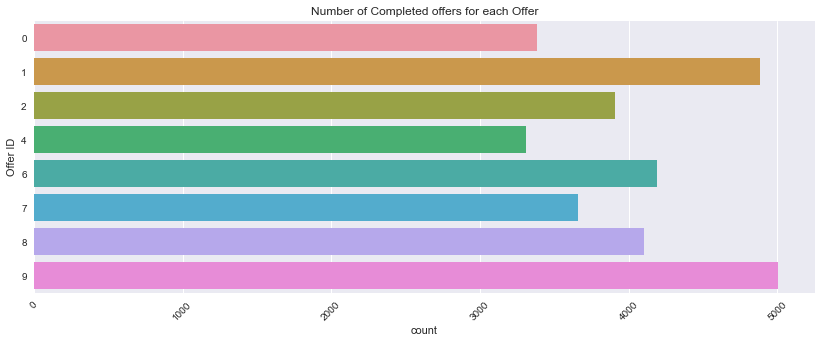

In [56]:
#completed_off_count = transcript[transcript['event'] == 'offer completed']
plt.figure(figsize=(14, 5))
offer_completed = offers_df[offers_df["event"] == "offer completed"]
sns.countplot(y=offer_completed['offer_id'])
plt.title('Number of Completed offers for each Offer')
plt.ylabel('Offer ID')
plt.xticks(rotation = 45)
plt.show();


#### Ques 12: What is the highest completed offer?

In [57]:
print("Number of Completion: {}" .format(offer_completed.offer_id.value_counts().values[0]))
print("Offer ID with maximum offers completed:{}".format(offer_completed.offer_id.value_counts().index[0]))

Number of Completion: 5003
Offer ID with maximum offers completed:9


In [58]:
le1.inverse_transform([9])

array(['fafdcd668e3743c1bb461111dcafc2a4'], dtype=object)

- Ans12: Out of the orders completed,The offer_id which was a gained higher success rate is 'fafdcd668e3743c1bb461111dcafc2a4'
- with a total of 4957 completions

#### Ques13:What is the lowest completed offer??

In [59]:
print("Number of Completion: {}" .format(offer_completed.offer_id.value_counts().values[-1]))
print("Offer ID with minimum offers completed:{}".format(offer_completed.offer_id.value_counts().index[-1]))

Number of Completion: 3310
Offer ID with minimum offers completed:4


In [60]:
le1.inverse_transform([4])

array(['4d5c57ea9a6940dd891ad53e9dbe8da0'], dtype=object)

- Ans13: Out of the orders completed,The offer_id which was a gained least success rate is '4d5c57ea9a6940dd891ad53e9dbe8da0'
- with a total of 3281 completions

In [61]:
offers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148805 entries, 0 to 272761
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   event             148805 non-null  object        
 1   time              148805 non-null  int64         
 2   offer_id          148805 non-null  int32         
 3   amount            0 non-null       float64       
 4   gender            148805 non-null  int32         
 5   age               148805 non-null  int64         
 6   became_member_on  148805 non-null  datetime64[ns]
 7   income            148805 non-null  float64       
 8   start_year        148805 non-null  int64         
 9   reward            148805 non-null  float64       
 10  difficulty        148805 non-null  float64       
 11  duration          148805 non-null  float64       
 12  offer_type        148805 non-null  int32         
 13  email             148805 non-null  float64       
 14  mobi

In [62]:
# dropping these columns because with null values, datetime,object,category datatypes
cols_to_drop = ['age_groups','income_groups','amount','became_member_on' ,'event']
offers_df = offers_df.drop(columns= cols_to_drop)

In [63]:
offers_df.head()

,time,offer_id,gender,age,income,start_year,reward,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational,customer_id
0,0,6,0,75,100000.0,2017,5.0,5.0,7.0,0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1
1,6,6,0,75,100000.0,2017,5.0,5.0,7.0,0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1
3,132,6,0,75,100000.0,2017,5.0,5.0,7.0,0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1
5,168,5,0,75,100000.0,2017,0.0,0.0,3.0,2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1
6,216,5,0,75,100000.0,2017,0.0,0.0,3.0,2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1


## Data Modelling
#### Unsupervised Learning

In [64]:
from sklearn.cluster import KMeans

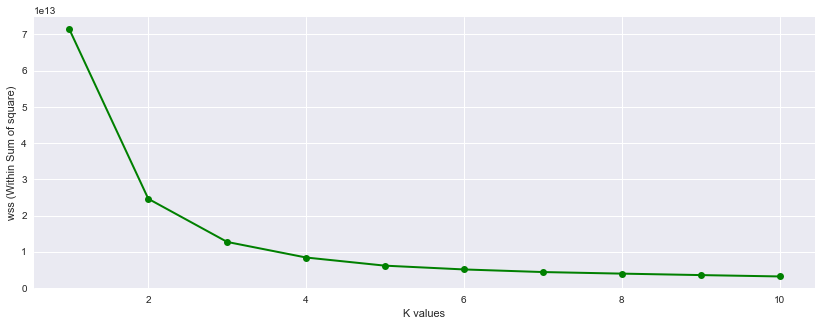

In [65]:
from sklearn.cluster import KMeans
wss = [] #within the sum of squares
for k in range(1,11): #take the range of Kvalues 1-10
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(offers_df) #Fit the subset of data
    wss.append(kmeans.inertia_) #inertia_ : Sum of squared distances of samples to their closest cluster center.

#Plot the Figure
plt.figure(1, figsize=(14,5))
plt.plot(range(1,11), wss, color='green', linewidth=2.0 , marker = "o")
plt.xlabel("K values")
plt.ylabel("wss (Within Sum of square)")
plt.show()

- The Graph makes an elbow at 2.
- Number of optimal clusters for the dataset is 2

In [66]:
#Take the number of clusters as 2
kmodel = KMeans(n_clusters=2)
#Fit the model to predict the labels
cluster_labels =kmodel.fit_predict(offers_df) 
cluster_labels #view the labels of the cluster

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
offers_df["cluster"] = cluster_labels

In [68]:
#Check the centroids for the above cluster model
kmodel.cluster_centers_

array([[3.55543460e+02, 4.67148036e+00, 4.82557962e-01, 6.00868598e+01,
        8.63629315e+04, 2.01656177e+03, 4.50519453e+00, 8.04793895e+00,
        6.66515858e+00, 7.11574201e-01, 1.00000000e+00, 9.10900893e-01,
        6.46467416e-01, 8.14032843e-01, 4.32562532e-01, 4.23300734e-01,
        1.44136733e-01, 7.11777053e+03],
       [3.53801946e+02, 4.75701969e+00, 6.68574658e-01, 5.05894612e+01,
        5.06664582e+04, 2.01658789e+03, 4.39290997e+00, 7.76632716e+00,
        6.59366996e+00, 7.32560517e-01, 1.00000000e+00, 9.22101035e-01,
        6.67660746e-01, 8.00995683e-01, 4.26147501e-01, 4.15144482e-01,
        1.58708017e-01, 7.08555857e+03]])

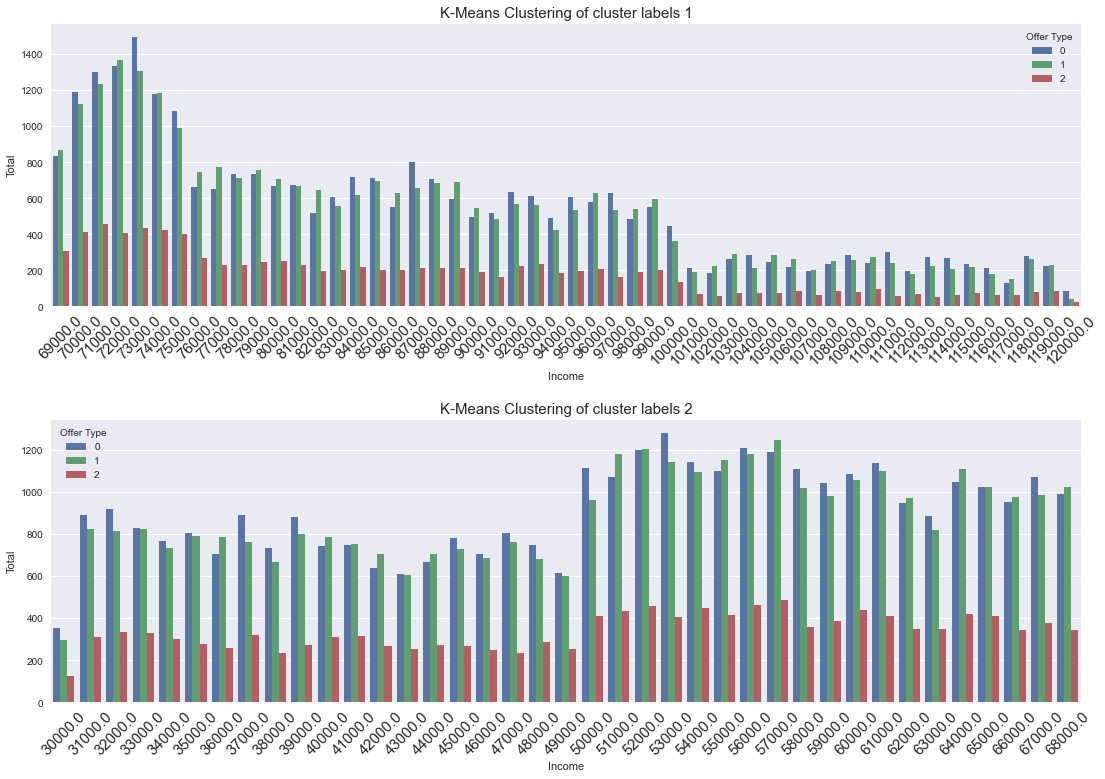

In [69]:
fig, ax = plt.subplots(1,2, figsize=(15, 10))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig.tight_layout()
plt.subplot(2, 1, 1)
sns.countplot(x="income", hue="offer_type", data=offers_df[cluster_labels==0]);
plt.title('K-Means Clustering of cluster labels 1',fontsize=15);
plt.ylabel('Total');
plt.xlabel('Income');
plt.xticks(rotation = 45,fontsize= 15);
plt.legend(title='Offer Type');

plt.subplot(2, 1, 2)
sns.countplot(x="income", hue="offer_type", data=offers_df[cluster_labels==1]);
plt.title('K-Means Clustering of cluster labels 2',fontsize=15);
plt.ylabel('Total');
plt.xlabel('Income');
plt.xticks(rotation = 45, fontsize= 15);
plt.legend(title='Offer Type');

plt.show();


- Compared to BOGO and Discount offer, the informational offers are very less popular.
- Few cases the Discout Offers are used more than the BOGO offers:
- In **cluster1** at income=51000, income=52000  and
- In **cluster2** at income=76000, income=77000
- Since the income is unevenly distributed,it can also be concluded that the annual income is indepedent of the purchasing behaviour

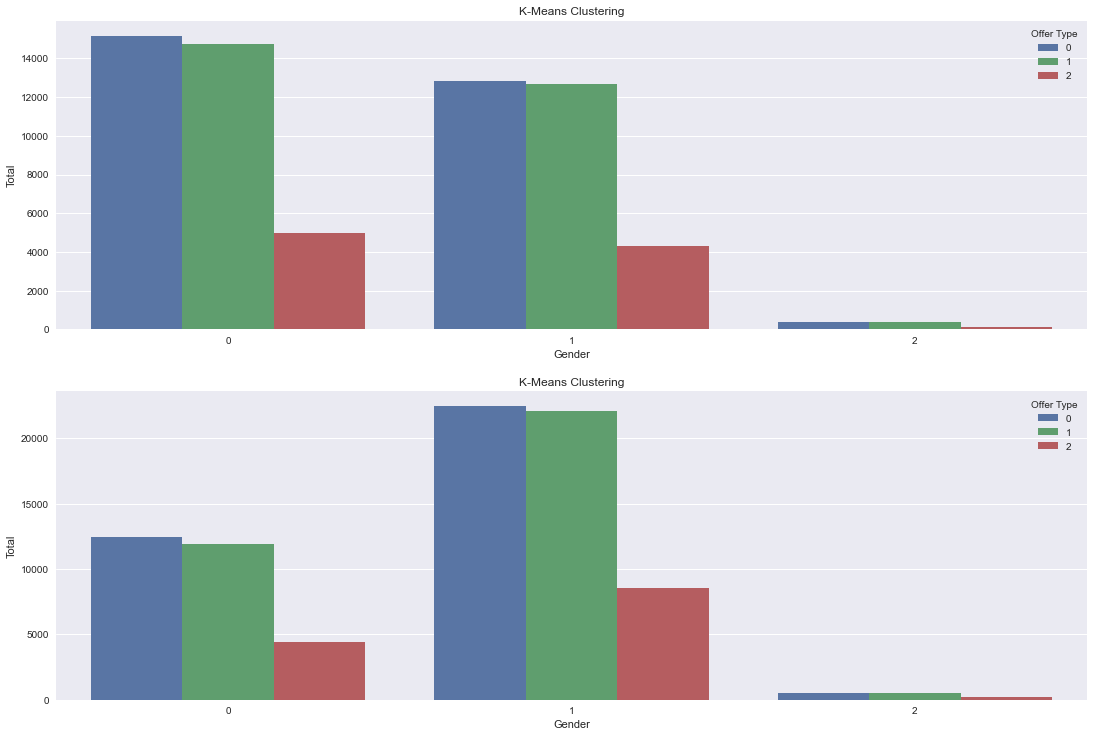

In [70]:
# Plot graph to find Most Popular Offers Type Gender wise for cluster 1
fig, ax = plt.subplots(1,2, figsize=(15, 10))

fig.tight_layout()

plt.subplot(2, 1, 1)
sns.countplot(x="gender", hue="offer_type", data=offers_df[cluster_labels==0])
plt.title('K-Means Clustering')
plt.ylabel('Total')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.legend(title='Offer Type')


plt.subplot(2, 1, 2)
sns.countplot(x="gender", hue="offer_type", data=offers_df[cluster_labels==1])
plt.title('K-Means Clustering')
plt.ylabel('Total')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.legend(title='Offer Type')
plt.show();

In [71]:
print("Income Range for Cluster 1:", offers_df[cluster_labels==0]['income'].min(), 
      "to", offers_df[cluster_labels==0]['income'].max())

print("Income Range for Cluster 2:", offers_df[cluster_labels==1]['income'].min(), 
      "to", offers_df[cluster_labels==1]['income'].max())

Income Range for Cluster 1: 69000.0 to 120000.0
Income Range for Cluster 2: 30000.0 to 68000.0


-  Compared to BOGO and Discount offer, the informational offers are less popular.
-  For **Cluster 1**, the income ranges from 30000.0 to 68000.0. 
-  It can thus be concluded  that Males with the above income range tend to spend more than Females and Other Genders for the BOGO and Discount Offers.
-  For **Cluster 2**, the income ranges from 69000.0 to 120000.0. 
-  It can thus be concluded  that Females with income range 71000.0 to 120000.0 tend to spend more than Males and Other Genders for the BOGO and Discount Offers.


## Supervised Learning
#### The target column is offer_type. 

In [72]:
offers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148805 entries, 0 to 272761
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   time           148805 non-null  int64  
 1   offer_id       148805 non-null  int32  
 2   gender         148805 non-null  int32  
 3   age            148805 non-null  int64  
 4   income         148805 non-null  float64
 5   start_year     148805 non-null  int64  
 6   reward         148805 non-null  float64
 7   difficulty     148805 non-null  float64
 8   duration       148805 non-null  float64
 9   offer_type     148805 non-null  int32  
 10  email          148805 non-null  float64
 11  mobile         148805 non-null  float64
 12  social         148805 non-null  float64
 13  web            148805 non-null  float64
 14  bogo           148805 non-null  float64
 15  discount       148805 non-null  float64
 16  informational  148805 non-null  float64
 17  customer_id    148805 non-nul

In [73]:
# Split the Data into Target and Features variables

target = offers_df['offer_type']
features = offers_df.drop(columns=['offer_type', 'customer_id', 'offer_id','cluster'])

In [74]:
features.head()

,time,gender,age,income,start_year,reward,difficulty,duration,email,mobile,social,web,bogo,discount,informational
0,0,0,75,100000.0,2017,5.0,5.0,7.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1,6,0,75,100000.0,2017,5.0,5.0,7.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,132,0,75,100000.0,2017,5.0,5.0,7.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
5,168,0,75,100000.0,2017,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
6,216,0,75,100000.0,2017,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [105]:
#Create training and testing sets
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(features, target)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (111603, 15)
Training Labels Shape: (111603,)
Testing Features Shape: (37202, 15)
Testing Labels Shape: (37202,)


### Metrics:
- It is a simple classification problem,
- we will use accuracy to evaluate my models.
- Comapre the correct predictions and total number of predicitons to determine the accuracy of the model and choose the best.
- **Six different ML algorithms** can be test on the datset :  
1. Decision Trees  
2. Logistic Regression  
3. Nearest Neighbours (KNN)  
4. Naive Bayes  
5. Random Forest  



In [125]:
def train_predict(model, X_train, y_train, X_test, y_test): 
    '''
    Description: Train the dataset and predict its accuracy using differnt ML algorithms
              for testing take first 300 training samples (X_train[:300],y_train[:300])
    INPUT:
       - model: the learning algorithm to be trained and predicted
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    OUTPUT:
        - Accuracy Scores and F Scores of the models
    '''
    
    results = {}
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
   
    # Predict on the X_test,
    predictions_test =model.predict(X_test)
    
    # Predict on the first 300 training samples(X_train)
    predictions_train = model.predict(X_train[:300]) 
    
    # Accuracy on  y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # F-score on y_train[:300]  using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta = 0.5, average='weighted') # average = weighted because multiclass classification
        
    #  F-score on  y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5, average='weighted')
       
    print("{} trained.".format(model.__class__.__name__))
        
    # Return the results
    return results

In [126]:
# Initialize the models

lr = LogisticRegression()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB() 
dt = DecisionTreeClassifier()

In [127]:
# Collect results on the models
results = {}
for model in [lr, rf, knn, gnb, dt]:
    model_name = model.__class__.__name__
    results[model_name] = {}
    results[model_name] = train_predict(model, X_train, y_train, X_test, y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression trained.
RandomForestClassifier trained.
KNeighborsClassifier trained.
GaussianNB trained.
DecisionTreeClassifier trained.


In [128]:
for i in results.items():
    print (i[0])
    display(pd.DataFrame(i[1], index=range(1)))

LogisticRegression


,acc_train,acc_test,f_train,f_test
0,0.933333,0.94632,0.935468,0.947613


RandomForestClassifier


,acc_train,acc_test,f_train,f_test
0,1.0,1.0,1.0,1.0


KNeighborsClassifier


,acc_train,acc_test,f_train,f_test
0,0.88,0.820682,0.881312,0.824647


GaussianNB


,acc_train,acc_test,f_train,f_test
0,1.0,1.0,1.0,1.0


DecisionTreeClassifier


,acc_train,acc_test,f_train,f_test
0,1.0,1.0,1.0,1.0


- Accuracy score is 1 for  training and testing datasets for RandomForestClassifier,GaussianNB,DecisionTreeClassifier.
- To avoid overfitting, lets choose Logistic Regression.
- It has good results 0.93 on training and 0.94 on testing datasets.
- Since we have few binomial outcomes ( BOGO = 1, discount = 2, informational = 3 ) we can use logistic regression.

## Conclusion:
### Segmentation of startbucks Customers:
- The customers can be segmented depending on various parameters according to the campaign chosen
- On analysis the data using supervised and unsupervised learning(Kmeans), we can conclude that:
- Different segments of customers react to offers differently.
- Customers are attracted to BOGO and Discount offers more as compared to Informational Offers
- The buying behaviour of a customer is indepemdent of its annual income
- Starbucks have more male customers than females and other gender.
- Starbucks has more of the young crowd than those of the aged once.
- The result of the offer_type was prediced by training a supervised classifier. 
- Logistic Regression turned out to be the best algorithm for this task and predicts customer response with an accuracy rate of almost 93 %. Given the fact that also the same customer will react differently the same offer.